In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

# Beschreibende Statistik
# Wahrscheinlichkeitstheorie
# <span style="color:blue">Schließende Statistik</span>
## Punktschätzungen
## <span style="color:blue">Tests</span>
- Nullhypothesentest
- Binomialtest
- Gaußtest
- <span style="color:blue">$\chi^2$-Verteilung</span>
- <span style="color:blue">Bedeutung</span>
- $\chi^2$-Test
- Quantil-Quantil-Plot
- $\chi^2$-Anpassungs-Test
- t-Test

## Intervallschätzungen

Erinnerung:

#### Erwartungswert Summe i.i.d. Zufallsvariablen $X_i\sim X$
$$\mathcal{E}\bigl(\sum_{i=1}^N X_i\bigr)  = \sum_{i=1}^N \mathcal{E}(X_i) = n\cdot\mathcal{E}(X)$$

#### Varianz-Summe *un*abhängiger i.i.d. Zufallsvariablen
$$\mathrm{Var}\bigl( \sum_{i=1}^N X_i \bigr) =  \sum_{i=1}^N Var(X_i) = n\cdot \mathrm{Var}(X)$$

#### Standardisieren
Jede Zufallsvariable kann standardisiert werden:
$$X' = \frac{X-\mu}{\sigma}$$

Insbesondere kann jede *normalverteilte* Zufallsvariable $X\sim\mathcal{N}(\mu, \sigma^2)$ auf die Standardnormalverteilung überführt werden:
$$Z = \frac{X-\mu}{\sigma} \sim\mathcal{N}(0, 1)$$

# $Z^2$-Verteilung 

Für $Z \sim \mathcal{N}(0, 1)$ ist $Y = Z^2$ eine neue Zufallsvariable.

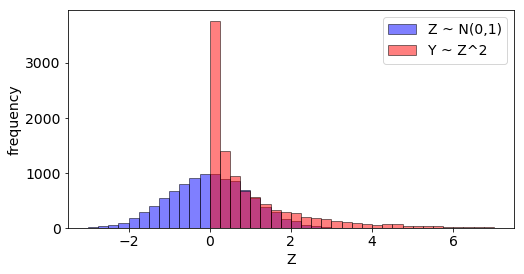

In [3]:
'''distribution of Z^2'''
Z = stats.norm.rvs(loc=0, scale=1, size=10000)   # Standard normal distribution
Y = Z**2                                         # new random variable Z^2
bins = np.linspace(-3., 7., 41)
fig = plt.figure(figsize=(8, 4))
plt.hist(Z, bins=bins, alpha=0.5, color='b', label='Z ~ N(0,1)', edgecolor='black')
plt.hist(Y, bins=bins, alpha=0.5, color='r', label='Y ~ Z^2', edgecolor='black')
plt.xlabel('Z')
plt.ylabel('frequency')
plt.legend();

# $\chi^2$-Verteilung in Python <tt>scipy.stats</tt>
Zur Berechnung hat **scipy.stats** die Methoden

    stats.chi2?
    ``rvs(df, loc=0, scale=1, size=1)``   Random variates.
    ``pdf(x, df, loc=0, scale=1)``        Probability density function.
    ``cdf(x, df, loc=0, scale=1)``        Cumulative density function.
    ``ppf(q, df, loc=0, scale=1)``        Percent point function (inverse of cdf).
    ...    

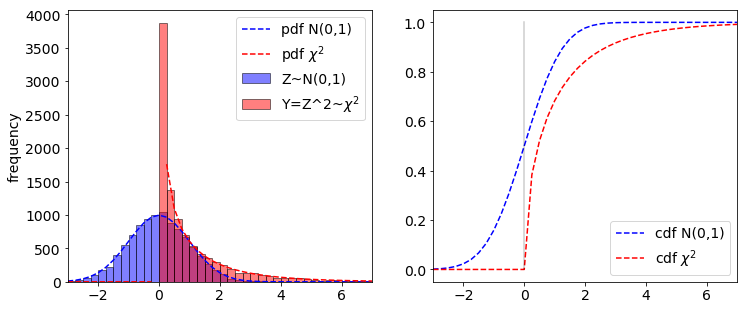

In [4]:
'''chi-square distribution: Python scipy.stats.chi2'''
N = 10000
Z = stats.norm.rvs(loc=0, scale=1, size=N) # standard normal distribution
Y = Z**2                                   # (vectorized) squared as before
bins = np.linspace(-3, 7, 41)
f = plt.figure(figsize=(12,5))
f.add_subplot(121)                         # --- left graph ---
plt.xlim((-3, 7))
plt.hist(Z, bins=bins, alpha=0.5, color='b', label='Z~N(0,1)', edgecolor='black')
plt.hist(Y, bins=bins, alpha=0.5, color='r', label='Y=Z^2~$\chi^2$', edgecolor='black')
x = np.linspace(-3., 7., 41)
plt.plot(x, N/4*stats.norm.pdf(x), 'b--', label='pdf N(0,1)')
plt.plot(x, N/4*stats.chi2(1).pdf(x), 'r--', label='pdf $\chi^2$')
plt.ylabel('frequency')
plt.legend()
f.add_subplot(122)                         # --- right graph ---
plt.xlim((-3, 7))
plt.plot(x, stats.norm.cdf(x), 'b--', label='cdf N(0,1)')
plt.plot(x, stats.chi2(1).cdf(x), 'r--', label='cdf $\chi^2$')
plt.plot((0, 0),(0, 1),'k-', alpha=.2)
plt.legend(loc='lower right');

Für $Z \sim \mathcal{N}(0,1)$ ist $\qquad\qquad Y = Z^2 \sim \chi^2(1)$

# Familie von Verteilungen: $\chi^2(N)$

Seien $Z_i \sim \mathcal{N}(0,1)$, dann ist 
<div class="alert alert-block alert-success">
$$Y = \sum_{i=1}^N Z_i^2 \sim \chi^2(N)$$
</div>
*Chi-Quadrat* Verteilung eingeführt 1876 von F. R. Helmert; 1900 so benannt von K. Pearson.

#### Parameter
"*Freiheitsgrad*"-Paramter $N$:  **df** (*degree of freedom*)

#### Vektor-Notation
$$Y = \sum Z_i^2 = \mathbf{z}^T\mathbf{z}$$

    stats.chi2?

    Parameters
    ----------
    df : array_like                        shape parameters
    loc : array_like, optional             location parameter (default=0)
    scale : array_like, optional           scale parameter (default=1)
    size : int or tuple of ints, optional  shape (default computed from input arguments )

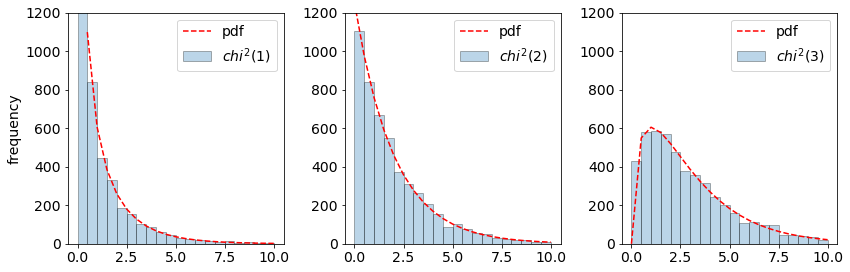

In [5]:
'''by hand: sum up to six squared random variables from standard normal distribution'''
Nmax = 6
np.random.seed(345678)
Zij = stats.norm.rvs(size=(Nmax,5000))  # draw 6 times 5000 rvs of standardnormal
f = plt.figure(figsize=(12,4))
bins = np.linspace(0., 10., 21)
chisq = np.zeros_like( Zij[0] )         # initialize chisquare's sum of Z to zero
for n in range(1, 4):                   # range = {1..3}  inclusive
    chisq += Zij[n-1][:]**2             # add the n-th distribution squared
    f.add_subplot(1, 3, n)
    plt.hist(chisq, bins=bins, alpha=.3, label='$chi^2$({})'.format(n), edgecolor='black')
    plt.ylim((0, 1200))
    plt.plot(bins, 2500*stats.chi2(n).pdf(bins),'r--', label='pdf')
    if n==1: # first, left most, only
        plt.ylabel('frequency')
    plt.legend(loc='upper right')
plt.tight_layout();

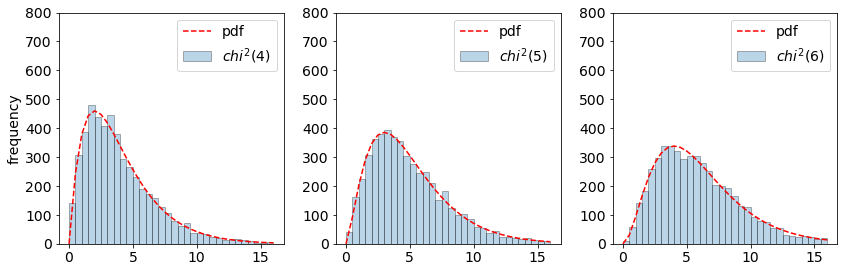

In [6]:
'''continue above 4..6, keep sum of {1..3}'''
f = plt.figure(figsize=(12,4))
bins = np.linspace(0., 16., 33)
for n in range(4, Nmax+1):              # range = {4..N}  inclusive
    chisq += Zij[n-1][:]**2             # add the n-th distribution squared
    f.add_subplot(1, 3, n-3)
    plt.hist(chisq, bins=bins, alpha=.3, label='$chi^2$({})'.format(n), edgecolor='black')
    plt.ylim((0, 800))
    plt.plot(bins, 2500*stats.chi2(n).pdf(bins),'r--', label='pdf')
    if n==4: # first, left most, only
        plt.ylabel('frequency')
    plt.legend(loc='upper right')
plt.tight_layout();

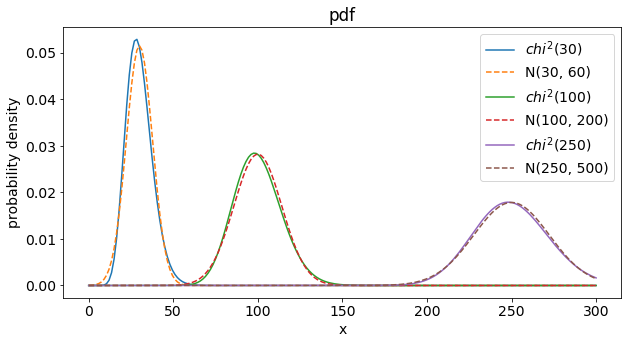

In [7]:
x = np.linspace(0., 300, 201)           # x values
plt.figure(figsize=(9,5))
for n in [30, 100, 250]:                # three examples with df=30, 100, 250
    plt.plot(x, stats.chi2(n).pdf(x), '-', label='$chi^2$({})'.format(n))
    plt.plot(x, stats.norm(loc=n, scale=np.sqrt(2*n)).pdf(x), '--', 
             label='N({}, {})'.format(n, 2*n))
plt.title('pdf')
plt.xlabel('x')
plt.ylabel('probability density')
plt.legend(loc='upper right')
plt.tight_layout();

### Form der Verteilung

$$f(x) = c x^{\frac{N}{2}-1} e^{-\frac{x}{2}}   \qquad für \;x\geq 0$$

mit der Konstanten $c = ...\Gamma...$

## Erwartungswert

Der Erwartungswert von $Y = Z^2$ mit $Z \sim \mathcal{N}(0, 1)$ ist 
$$\mathcal{E}(Y) = 1$$

#### Beweis:
$\mathcal{E}(Y) = \mathcal{E}(Z^2) = \mathrm{Var}(Z) = \sigma^2 = 1$

### $N \geq 1$

Seien $Z_i \sim \mathcal{N}(0, 1)$ unabhängige Zufallsvariablen und $Y=\sum_{i=1}^NZ_i^2$, dann gilt für den Erwartungswert eines $\chi^2(N)$-verteilten $Y$

<div class="alert alert-block alert-success">
$$\mathcal{E}(Y) = N$$ 
</div>

#### Beweis:
$\mathcal{E}(Y) = \mathcal{E}(\sum_{i=1}^NZ_i^2)
= \sum_{i=1}^N\mathcal{E}(Z_i^2) 
= N\mathcal{E}(Z^2)
= N\cdot 1$

## Varianz

Die $\chi^2(N)$-Verteilung mit $Y = \sum_{i=1}^N Z_i^2$ mit $Z_i \sim \mathcal{N}(0,1)$ 
und damit Erwartungswert $N$ hat die Varianz

$$\mathrm{Var}(Y) = \mathcal{E}((Y-N)^2) = 2N$$

#### Beweis
(Kann über die Form der Gammafunktion bewiesen werden)

Hier als Demonstration:

In [8]:
chisq = np.zeros_like( Zij[0] )     # initialize chisquare's sum of Z to zero
for n in range(Nmax):               # range = {1..3}  inclusive
    chisq += Zij[n][:]**2           # add the n-th distribution squared
    print('z^2[{}].sum mean = {:.2f}  variance = {:5.2f}, theor. = {:5.2f}'
          .format(n+1, chisq.mean(), chisq.std()**2, stats.chi2(n+1).var()))

z^2[1].sum mean = 1.01  variance =  2.14, theor. =  2.00
z^2[2].sum mean = 2.04  variance =  4.34, theor. =  4.00
z^2[3].sum mean = 3.02  variance =  6.43, theor. =  6.00
z^2[4].sum mean = 4.05  variance =  8.47, theor. =  8.00
z^2[5].sum mean = 5.04  variance = 10.29, theor. = 10.00
z^2[6].sum mean = 6.03  variance = 12.16, theor. = 12.00


## Reproduktions-Eigenschaft
Seien $Y_k$ unabhängig $\chi^2(n_k)$-verteilt und sei $Y = \sum_{k=1}^m Y_k$, dann ist 
$$ Y \sim \chi^2(\textstyle{\sum_{k=1}^m} n_k)$$
wieder $\chi^2$ verteilt.

#### Beweis
$Y = \sum_k Y_k = \sum_k \sum_i Z_{ik}^2 = \sum_j Z_j^2$

## Wahrscheinlichkeitsverteilungsfunktion

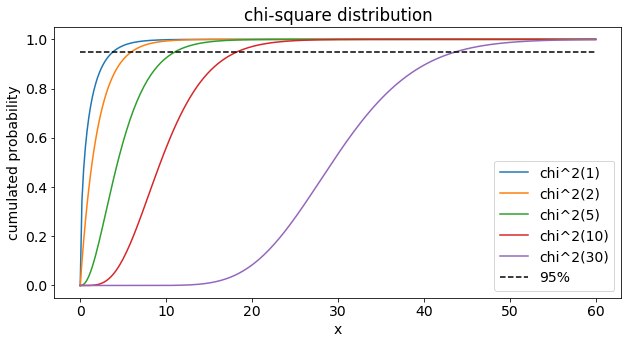

In [9]:
'''cumulative distribution function of chi-square'''
fig = plt.figure(figsize=(9, 5))
ns = [1, 2, 5, 10, 30]
x = np.linspace(0., 60., 301)
for n in ns:
    plt.plot(x, stats.chi2(df=n).cdf(x), label='chi^2({})'.format(n))
plt.plot([x[0], x[-1]], 2*[.95], 'k--', label='95%')
plt.title('chi-square distribution')
plt.xlabel('x')
plt.ylabel('cumulated probability')
plt.legend(loc='lower right')
plt.tight_layout();

In [10]:
'''cumulative distribution function of chi-square'''
ns = [1, 2, 5, 10, 30]
x = np.linspace(0., 60., 301)
for n in ns:
    print('95% of chi²({:2d}) at {:6.3f}'.format(n, stats.chi2(df=n).ppf(.95)))

95% of chi²( 1) at  3.841
95% of chi²( 2) at  5.991
95% of chi²( 5) at 11.070
95% of chi²(10) at 18.307
95% of chi²(30) at 43.773


# Zusammenfassung $\;\chi^2(N)$-Verteilung

- Ausgangspunkt: Standardnormalverteilungen $Z_i \sim \mathcal{N}(0,1)$
- Neue Zufallsvariable $Y_i = Z_i^2$
- Dann ist $Y = \sum_{i=1}^N Y_i\;$  $\;\chi^2(N)$-verteilt
- Paramter der Verteilung: $N$
    - Anzahl der Freiheitsgrade
    - degree of freedom: $df$
    - bestimmt die Form: 
        - Um Null herum
        - Schiefe
        - ab N=30 ähnlich Normalverteilt
- Erwartungswert: $\mathcal{E}(\chi^2(N)) = N$
- Varianz: $\mathrm{Var}(\chi^2(N)) = 2N$
- Reproduzierbarkeit
    - $\sum \chi^2(n_i) \sim \chi^2(\sum n_i)$

# Fragen?